# 라이브러리 & 데이터 불러오기

In [99]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv('all_data.csv')
data.head(5)

In [100]:
%cd /content/drive/My Drive/Colab Notebooks/hack

/content/drive/My Drive/Colab Notebooks/hack


In [ ]:
c

In [224]:
df = pd.read_csv('food_data_9.csv')
df.head(5)

,SAMPLE_ID,식품코드,DB군,상용제품,food_name,연도,지역 / 제조사,채취시기,식품상세분류,1회제공량,내용량_단위,총내용량(g),총내용량(mL),에너지(㎉),에너지(kj),수분(g),수분(%),단백질(g),지방(g),탄수화물(g),총당류(g),자당(g),포도당(g),과당(g),유당(g),맥아당(g),갈락토오스(g),총 식이섬유(g),총 식이섬유(%),수용성 식이섬유(g),불용성 식이섬유(g),셀룰로오스(%),리그닌(%),칼슘(㎎),철(㎎),철(㎍),마그네슘(㎎),인(㎎),칼륨(㎎),나트륨(㎎),...,감마 리놀렌산(18:3(n-6))(㎎),스테아리돈산(18:4)(%),에이코사디에노산(20:2(n-6))(g),에이코사디에노산(20:2(n-6))(㎎),에이코사트리에노산(20:3(n-3))(㎎),에이코사트리에노산(20:3(n-6))(g),에이코사트리에노산(20:3(n-6))(㎎),아라키돈산(20:4(n-6))(g),아라키돈산(20:4(n-6))(㎎),아라키돈산(20:4(n-6))(%),에이코사테트라에노산(20:4(n-3))(㎎),에이코사펜타에노산(20:5(n-3))(g),에이코사펜타에노산(20:5(n-3))(㎎),에이코사펜타에노산(20:5(n-3))(%),도코사디에노산(22:2)(㎎),도코사펜타에노산(22:5(n-3))(g),도코사펜타에노산(22:5(n-3))(㎎),도코사헥사에노산(22:6(n-3))(g),도코사헥사에노산(22:6(n-3))(㎎),도코사헥사에노산(22:6(n-3))(%),EPA와 DHA의 합(㎎),오메가 3 지방산(g),오메가 6 지방산(g),트랜스 지방산(g),트랜스 올레산(18:1(n-9)t)(g),트랜스 올레산(18:1(n-9)t)(㎎),트랜스 리놀레산 (18:2t)(g),트랜스 리놀레산 (18:2t)(㎎),트랜스 리놀레산(18:3t)(g),트랜스 리놀레산(18:3t)(㎎),트랜스 리놀레산(18:3t)(%),냉산가용성물질(㎎),식염상당량(g),회분(g),폐기율(%),가식부(%),산가용성물질(%),카페인(㎎),성분표출처,발행기관
0,D000123-ZZ-D06,D000123,음식,품목대표,수수부꾸미,2019,전국(대표),6월,곡류 및 서류,100.0,g,0.0,0,247.892,0,44.527,0,5.729,6.287,42.099,0.235,0.0,0.0,0.235,0.0,0.0,0,7.95,0,0,0,0,0,17.243,0.00,1.309,45.03,111.362,190.726,261.002,...,0,0,0.0,0,0,0.0,0,0.0,0,0,0,0.0,0,0,0,0.0,0,0.0,0,0,0,0,0,0.028,0.0,0,0.0,0,0.0,0,0,0,0,1.358,0,0,0,0.0,식약처('14) 명절,식품의약품안전처
1,D018006-ZZ-AVG,D018006,음식,품목대표,약식,2020,전국(대표),평균,곡류 및 서류,100.0,g,0.0,0,219.000,0,47.200,0,4.200,2.500,45.200,13.200,8.6,2.2,2.500,0.0,0.0,0,2.60,0,0,0,0,0,13.380,0.33,0.000,20.84,43.440,85.400,221.180,...,0,0,0.0,0,0,0.0,0,0.0,0,0,0,0.0,0,0,0,0.0,0,0.0,0,0,0,0,0,0.000,0.0,0,0.0,0,0.0,0,0,0,0,0.900,0,0,0,0.0,식약처 영양실태조사('20),식품의약품안전처
2,D015487-ZZ-AVG,D015487,음식,외식,3mm 황금비율로 바삭하고 고소한 전병세트,2019,파리바게뜨,평균,과자류,100.0,g,270.0,0,270.000,0,0.000,0,7.000,0.000,0.000,26.000,0.0,0.0,0.000,0.0,0.0,0,0.00,0,0,0,0,0,0.000,0.00,0.000,0.00,0.000,0.000,250.000,...,0,0,0.0,0,0,0.0,0,0.0,0,0,0,0.0,0,0,0,0.0,0,0.0,0,0,0,0,0,0.000,0.0,0,0.0,0,0.0,0,0,0,0,0.000,0,0,0,0.0,식약처('19),식품의약품안전처
3,D017096-ZZ-AVG,D017096,음식,외식,가나슈쿠키,2019,뚜레쥬르,평균,과자류,140.0,g,140.0,0,776.000,0,0.000,0,12.000,0.000,0.000,21.000,0.0,0.0,0.000,0.0,0.0,0,0.00,0,0,0,0,0,0.000,0.00,0.000,0.00,0.000,0.000,11.000,...,0,0,0.0,0,0,0.0,0,0.0,0,0,0,0.0,0,0,0,0.0,0,0.0,0,0,0,0,0,0.000,0.0,0,0.0,0,0.0,0,0,0,0,0.000,0,0,0,0.0,식약처('19),식품의약품안전처
4,D012442-ZZ-AVG,D012442,음식,외식,고구마 L(리코타링),2019,7번가피자,평균,과자류,120.0,g,956.0,0,315.000,0,0.000,0,15.000,0.000,0.000,4.000,0.0,0.0,0.000,0.0,0.0,0,0.00,0,0,0,0,0,0.000,0.00,0.000,0.00,0.000,0.000,476.000,...,0,0,0.0,0,0,0.0,0,0.0,0,0,0,0.0,0,0,0,0.0,0,0.0,0,0,0,0,0,0.000,0.0,0,0.0,0,0.0,0,0,0,0,0.000,0,0,0,0.0,식약처('19),식품의약품안전처


In [225]:
df_2 = pd.DataFrame([df['food_name'],df['식품상세분류']])
df_2 = df_2.T

In [226]:
df_3 = pd.get_dummies(df['식품상세분류'])
df_4 = pd.get_dummies(df[['food_name','식품상세분류']])

In [193]:
df_3.columns

Index(['곡류 및 서류', '과자류', '구이류', '국&탕류', '김밥(초밥)류', '떡류', '떡볶이류', '리조또.그라탕류',
       '만두류', '면류', '무침류', '버거류', '볶음류', '볶음밥&덮밥류', '부침류', '비빔밥&죽류', '빵류',
       '샌드위치류', '샐러드', '샐러드류', '스프류', '아이스크림&빙과류', '유제품&초콜릿류', '음료류',
       '젓갈&장아찌&절임류', '조림류', '찌개&전골류', '찜류', '치킨류', '커피류', '케이크류', '튀김류',
       '포&회류', '피자류'],
      dtype='object')

# PCA

In [227]:
X = df_3

In [ ]:
!pip install mglearn

In [17]:
import mglearn

In [228]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [229]:
X_scaled = scaler.transform(X)

In [230]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components = 2)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

In [182]:
X_pca.shape

(3703, 2)

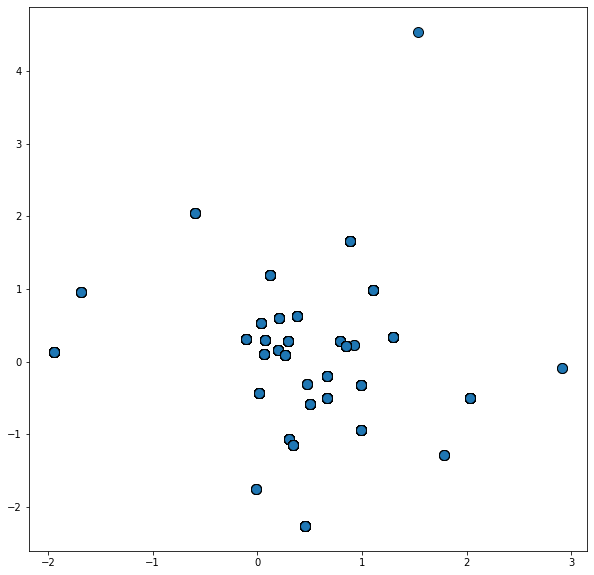

In [231]:
plt.figure(figsize = (10,10))
mglearn.discrete_scatter(X_pca[:,0], X_pca[:,1], markers='o')

# 병합군집

In [19]:
from sklearn.cluster import AgglomerativeClustering

In [240]:
agg = AgglomerativeClustering(n_clusters=31)
assignment = agg.fit_predict(X_pca)

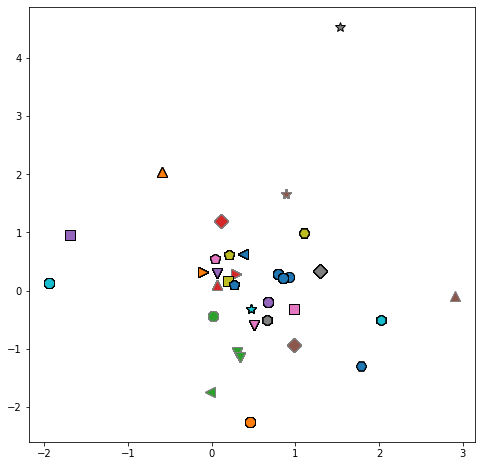

In [241]:
plt.figure(figsize = (8,8))
mglearn.discrete_scatter(X_pca[:,0], X_pca[:,1], assignment)

In [242]:
df_2['label'] = assignment

In [243]:
df_2['label'].unique()

array([25, 26,  2, 13, 19, 22, 29,  1, 27, 18, 23,  0, 28, 14,  6,  5, 10,
       12, 17, 16,  4, 21,  3,  8,  7, 15, 11, 24, 30, 20,  9])

In [144]:
df_2['label'] = assignment

In [34]:
df_label_8 = df_2[df_2['label'] == 8]


In [38]:
df_label_1 = df_2[df_2['label'] == 1]
df_label_2 = df_2[df_2['label'] == 2]
df_label_3 = df_2[df_2['label'] == 3]
df_label_4 = df_2[df_2['label'] == 4]
df_label_5 = df_2[df_2['label'] == 5]
df_label_6 = df_2[df_2['label'] == 6]
df_label_6 = df_2[df_2['label'] == 6]
df_label_8 = df_2[df_2['label'] == 8]
df_label_8 = df_2[df_2['label'] == 8]
df_label_8 = df_2[df_2['label'] == 8]
df_label_8 = df_2[df_2['label'] == 8]
df_label_8 = df_2[df_2['label'] == 8]
df_label_8 = df_2[df_2['label'] == 8]
df_label_8 = df_2[df_2['label'] == 8]
df_label_8 = df_2[df_2['label'] == 8

In [37]:
df_label_8['식품상세분류'].unique()

array(['곡류 및 서류', '육류볶음', '채소류조림'], dtype=object)

In [39]:
df_2[df_2['label'] == 1]['식품상세분류'].unique()

array(['기타 빵류', '나물.채소류무침', '채소류찜', '커피류', '한과류'], dtype=object)

In [248]:
result = []
for i in range(0, 31):
  value = df_2[df_2['label'] == i]['식품상세분류'].unique()
  result.append(value)

In [ ]:
df_2[df_2['label'] == 1]['식품상세분류'].unique()

array(['기타 빵류', '나물.채소류무침', '채소류찜', '커피류', '한과류'], dtype=object)

In [247]:
result

[array(['볶음류', '스프류', '커피류'], dtype=object),
 array(['만두류'], dtype=object),
 array(['구이류', '국&탕류'], dtype=object),
 array(['젓갈&장아찌&절임류'], dtype=object),
 array(['유제품&초콜릿류'], dtype=object),
 array(['빵류'], dtype=object),
 array(['비빔밥&죽류'], dtype=object),
 array(['찌개&전골류'], dtype=object),
 array(['조림류'], dtype=object),
 array(['피자류'], dtype=object),
 array(['샌드위치류'], dtype=object),
 array(['치킨류'], dtype=object),
 array(['샐러드'], dtype=object),
 array(['김밥(초밥)류'], dtype=object),
 array(['부침류'], dtype=object),
 array(['찜류'], dtype=object),
 array(['아이스크림&빙과류'], dtype=object),
 array(['샐러드류'], dtype=object),
 array(['무침류'], dtype=object),
 array(['떡류'], dtype=object),
 array(['포&회류'], dtype=object),
 array(['음료류'], dtype=object),
 array(['떡볶이류'], dtype=object),
 array(['버거류'], dtype=object),
 array(['케이크류'], dtype=object),
 array(['곡류 및 서류'], dtype=object),
 array(['과자류'], dtype=object),
 array(['면류'], dtype=object),
 array(['볶음밥&덮밥류'], dtype=object),
 array(['리조또.그라탕류'], dtype=object),
 arra

In [205]:
df_2.to_csv("result_3.csv")

In [206]:
df_2

,food_name,식품상세분류,label
0,수수부꾸미,곡류 및 서류,15
1,약식,곡류 및 서류,15
2,3mm 황금비율로 바삭하고 고소한 전병세트,과자류,9
3,가나슈쿠키,과자류,9
4,고구마 L(리코타링),과자류,9
...,...,...,...
3698,황금커리피자피자,피자류,18
3699,흥부 포테이토(골드스윗),피자류,18
3700,흥부 포테이토(리코타링),피자류,18
3701,흥부 포테이토(석쇠),피자류,18
